In [1]:
!pip install pandas
import pandas as pd

In [2]:
df = pd.read_csv("weatherHistory.csv")

In [3]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
df = df[["Formatted Date", "Temperature (C)"]]

In [5]:
df.head()

,Formatted Date,Temperature (C)
0,2006-04-01 00:00:00.000 +0200,9.472222
1,2006-04-01 01:00:00.000 +0200,9.355556
2,2006-04-01 02:00:00.000 +0200,9.377778
3,2006-04-01 03:00:00.000 +0200,8.288889
4,2006-04-01 04:00:00.000 +0200,8.755556


In [6]:
df["Formatted Date"] = pd.to_datetime(df['Formatted Date'], errors='coerce')

In [7]:
df["Formatted Date"].dropna(inplace=True)

In [8]:
df["Year"] = pd.to_datetime(df["Formatted Date"], utc=True).dt.year

In [9]:
df.drop("Formatted Date", axis='columns', inplace=True)

In [10]:
df = df.groupby("Year", as_index=True).mean().reset_index()

In [11]:
df.head()

,Year,Temperature (C)
0,2005,0.577778
1,2006,11.215225
2,2007,12.134677
3,2008,12.161819
4,2009,12.269682


In [12]:
df.rename(columns={"Temperature (C)": "Temperature"}, inplace=True)
df = df[df['Year'] > 2005]

In [13]:
df.head()

,Year,Temperature
1,2006,11.215225
2,2007,12.134677
3,2008,12.161819
4,2009,12.269682
5,2010,11.200176


In [14]:
!pip install sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [15]:
%matplotlib inline

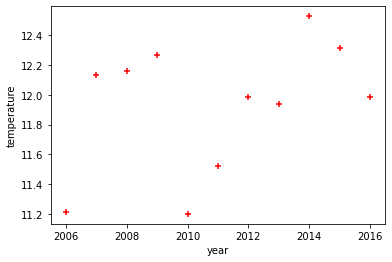

In [16]:
plt.xlabel('year')
plt.ylabel('temperature')
plt.scatter(df["Year"], df["Temperature"], marker='+', color='red')

In [21]:
reg = linear_model.LinearRegression()
reg.fit(df[['Year']].values, df['Temperature'].values)

LinearRegression()

In [22]:
reg.predict([[2011]])

array([11.93291364])

In [23]:
reg.coef_

array([0.05271793])

In [24]:
reg.intercept_

-94.08283519176325

In [26]:
dfp = reg.predict(df[['Year']].values)
dfp

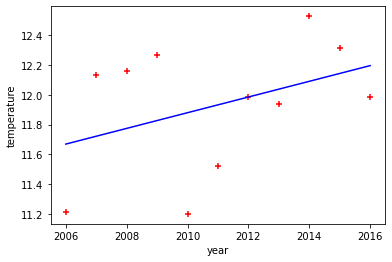

In [28]:
plt.xlabel('year')
plt.ylabel('temperature')
plt.scatter(df["Year"], df["Temperature"], marker='+', color='red')
plt.plot(df['Year'], dfp, color='blue')